In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
ce5_df = pd.read_csv('../data/slurm_wrapper_ce6.csv')

In [15]:
ce5_df = ce5_df.rename(columns={'4': 'RETURNCODE'})
ce5_df['RETURNCODE'] = ce5_df['RETURNCODE'].str.extract(r'(\d)').astype(int)
ce5_df['TIME'] = pd.to_datetime(ce5_df['0'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
cs5_ts = pd.Series(1, index=list(ce5_df['TIME']))
cs5_resample = cs5_ts.resample('D').sum()

cs5_error_ts = pd.Series(list(ce5_df['RETURNCODE']), index=list(ce5_df['TIME']))
cs5_error_resample = cs5_error_ts.resample('D').sum()

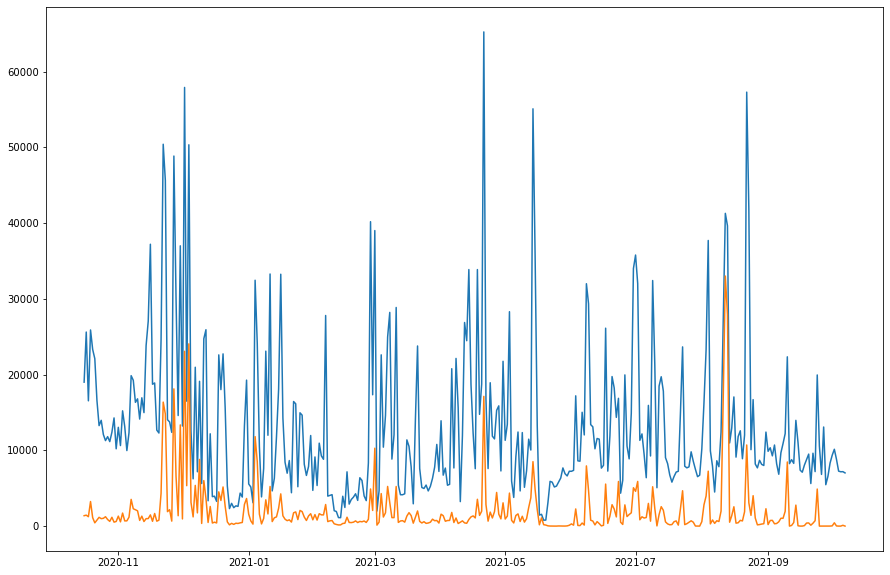

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(cs5_resample.index, cs5_resample)
plt.plot(cs5_error_resample.index, cs5_error_resample)

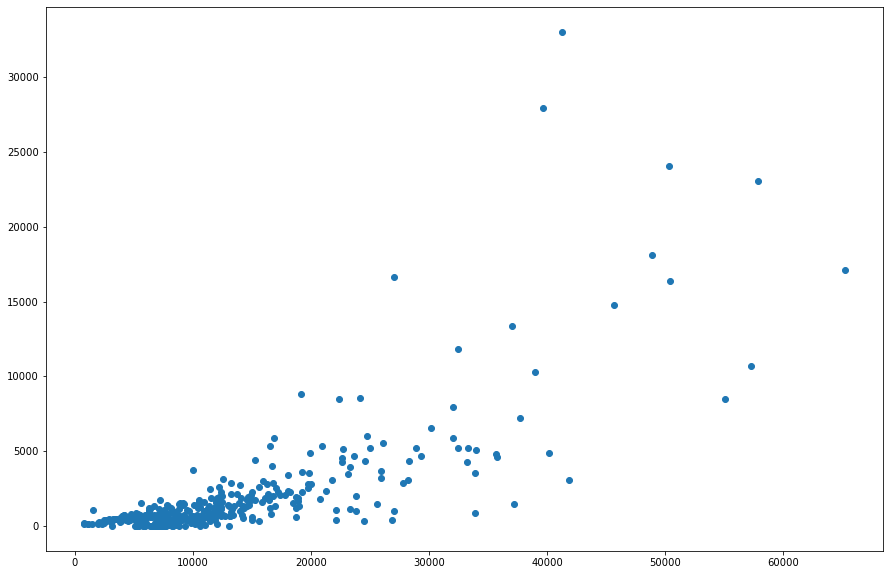

In [20]:
plt.figure(figsize=(15, 10))
plt.scatter(cs5_resample, cs5_error_resample)